In [1]:
# Apply Imports

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# Load and preprocess data
def load_data(file_path):
    # Load data from CSV file
    url = 'https://raw.githubusercontent.com/Okazeil/ML_Final_project/main/pm_sensor_data_converted.csv'
    data = pd.read_csv(url)

    # Split data into features and labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    return X, y

# Define the model
def build_tuned_model(input_shape, n_layers=2, n_neurons=64, learning_rate=0.001):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu', input_shape=(input_shape,)))
    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
# Load data Universal
file_path = 'https://raw.githubusercontent.com/Okazeil/ML_Final_project/main/pm_sensor_data_converted.csv'
X, y = load_data(file_path)



Shape of X: (91, 3)
Shape of y: (91,)
Epoch 1/100
2/2 [==============================] - 1s 260ms/step - loss: 0.6611 - accuracy: 0.8772 - val_loss: 0.5209 - val_accuracy: 0.8667
Epoch 2/100
2/2 [==============================] - 0s 56ms/step - loss: 0.4953 - accuracy: 0.8772 - val_loss: 0.3767 - val_accuracy: 0.8667
Epoch 3/100
2/2 [==============================] - 0s 46ms/step - loss: 0.4178 - accuracy: 0.8947 - val_loss: 0.1933 - val_accuracy: 0.9333
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.3051 - accuracy: 0.9474 - val_loss: 0.1257 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2352 - accuracy: 0.9474 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.1624 - accuracy: 0.9474 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0835 - accuracy: 0.9649 - val_loss: 0.0165 - va

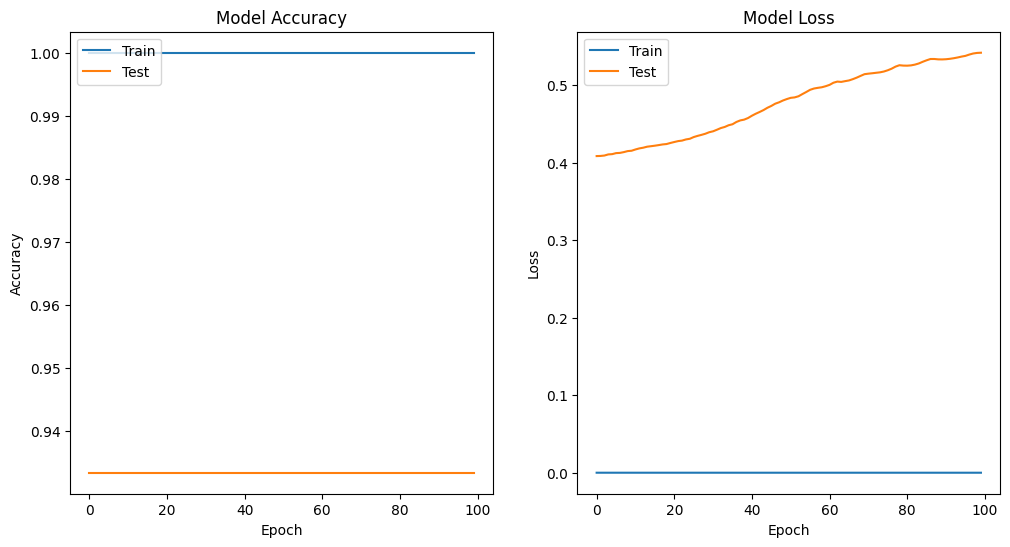

In [4]:
# Debugging: Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adjust these parameters based on your hyperparameter tuning results
n_layers = 3
n_neurons = 128
learning_rate = 0.01

# Build and train the model
model = build_tuned_model(input_shape=X_train.shape[1], n_layers=n_layers, n_neurons=n_neurons, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Here's an example of how you can create a 3D scatter plot of your data, with points color-coded based on their labels (working or not working):

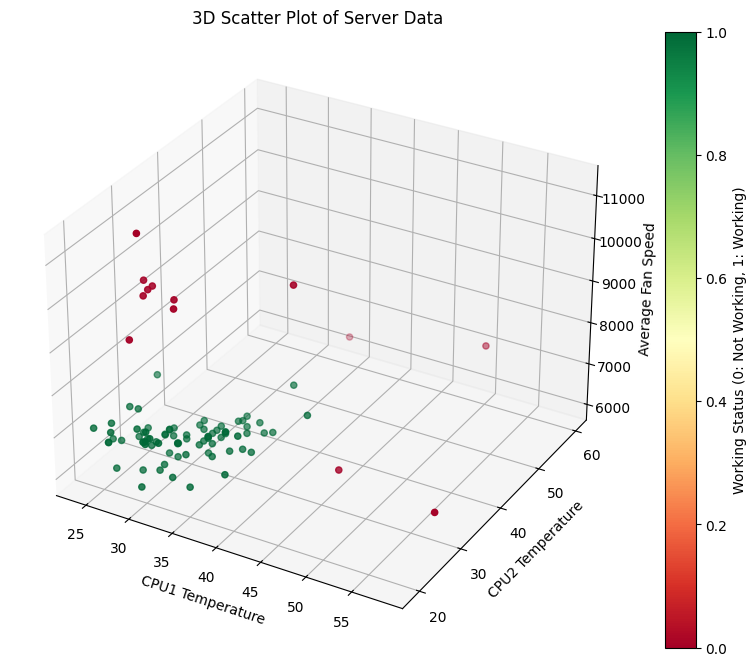

In [5]:
# Load data again to get unscaled values for better visualization
X, y = load_data(file_path)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='RdYlGn', marker='o')

# Labels and title
ax.set_xlabel('CPU1 Temperature')
ax.set_ylabel('CPU2 Temperature')
ax.set_zlabel('Average Fan Speed')
ax.set_title('3D Scatter Plot of Server Data')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Working Status (0: Not Working, 1: Working)')

plt.show()

Attempt to produce a user interaction


In [6]:
def predict_server_status(cpu1_temp, cpu2_temp, fan_speed, model, scaler):
    # Prepare the input data in the same format as the training data
    input_data = np.array([[cpu1_temp, cpu2_temp, fan_speed]])
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = model.predict(input_data_scaled)
    status = 'Working' if prediction[0][0] > 0.5 else 'Not Working'
    return status

# Example usage
status = predict_server_status(25, 22, 10000, model, scaler)
print("Server Status:", status)

1/1 [==============================] - 0s 136ms/step
Server Status: Not Working


In [8]:
model.save('my_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [9]:
import tensorflow as tf
import joblib

# Load the TensorFlow model
model = tf.keras.models.load_model('my_model.h5')

# Load the scaler
scaler = joblib.load('scaler.gz')

In [10]:
import pandas as pd

# Load the data
data_df = pd.read_csv(file_path)

# Apply scaling
X_scaled = scaler.transform(data_df[['cpu1_temp', 'cpu2_temp', 'average_fan_speed']])

C:\Users\okaze\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [11]:
# Make predictions
predictions = model.predict(X_scaled)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

3/3 [==============================] - 0s 2ms/step


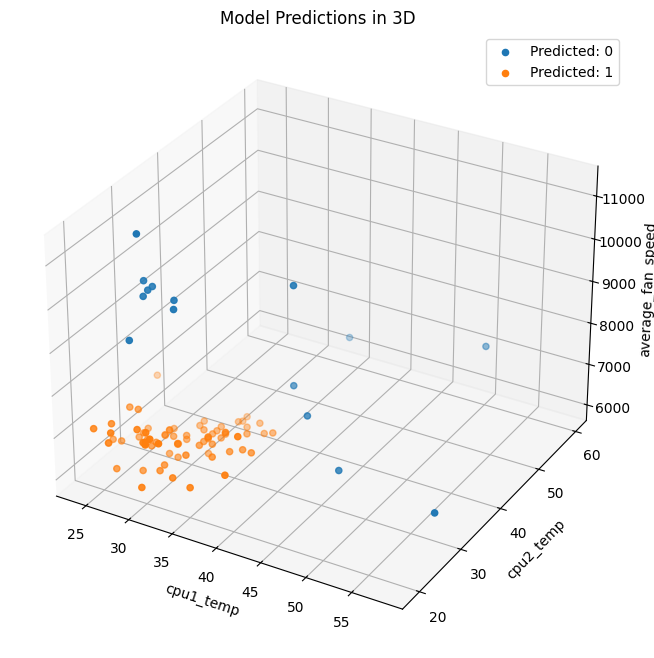

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting features for the plot
feature1 = 'cpu1_temp'
feature2 = 'cpu2_temp'
feature3 = 'average_fan_speed'

# Create a 3D scatter plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Plotting data points with different colors based on predicted label
for label in [0, 1]:
    filtered_data = data_df[predicted_labels == label]
    ax.scatter(filtered_data[feature1], filtered_data[feature2], filtered_data[feature3], label=f'Predicted: {label}')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.legend()
ax.set_title('Model Predictions in 3D')
plt.show()

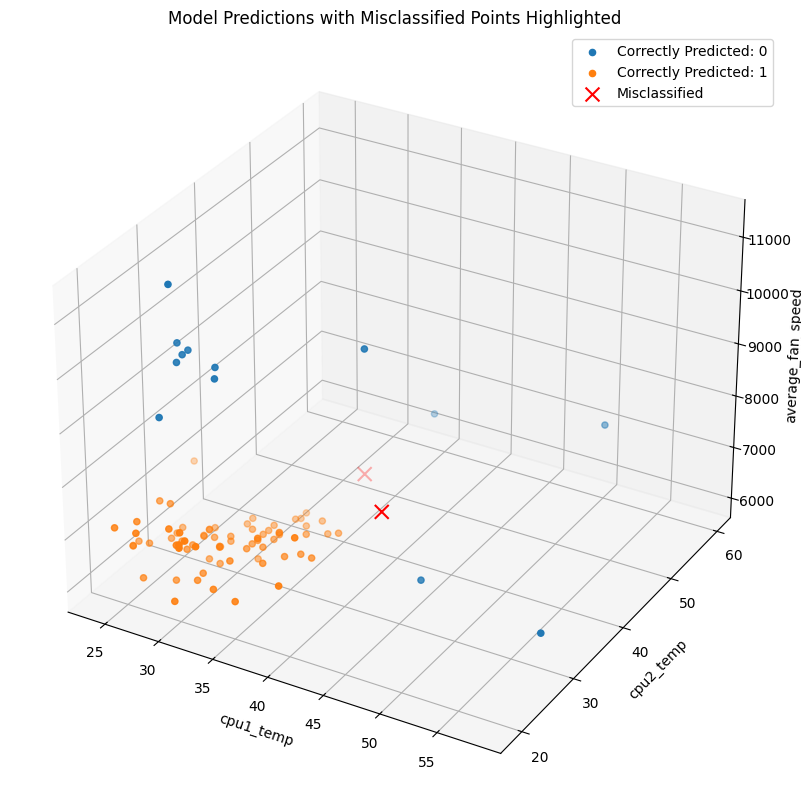

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Actual labels
actual_labels = data_df['working']

# Identify misclassified points
misclassified = predicted_labels != actual_labels

# Selecting features for the plot
feature1 = 'cpu1_temp'
feature2 = 'cpu2_temp'
feature3 = 'average_fan_speed'

# Create a 3D scatter plot
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

# Plotting correctly classified points
for label in [0, 1]:
    filtered_data = data_df[(predicted_labels == label) & ~misclassified]
    ax.scatter(filtered_data[feature1], filtered_data[feature2], filtered_data[feature3], label=f'Correctly Predicted: {label}')

# Highlighting misclassified points
ax.scatter(data_df.loc[misclassified, feature1],
           data_df.loc[misclassified, feature2],
           data_df.loc[misclassified, feature3],
           color='red', marker='x', label='Misclassified', s=100)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.legend()
ax.set_title('Model Predictions with Misclassified Points Highlighted')
plt.show()

In [14]:
# Calculate the number of misclassifications
num_misclassified = sum(misclassified)

# Print the number of misclassifications
print(f"Number of Misclassified Points: {num_misclassified}")

Number of Misclassified Points: 2


2D Visualisation of Decision Boundary

313/313 [==============================] - 0s 1ms/step


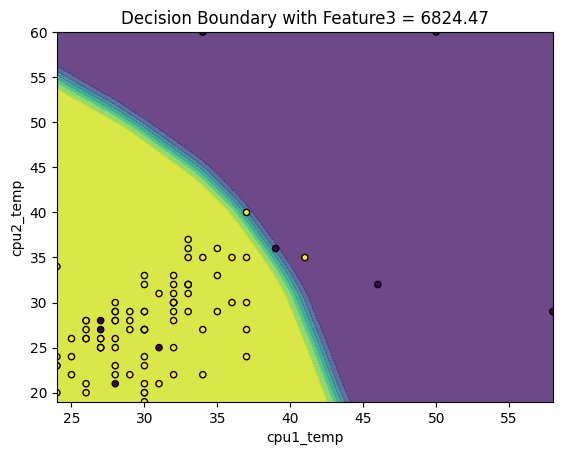

In [15]:
import numpy as np

# Feature ranges - you may need to adjust these based on your data
feature1_range = np.linspace(data_df[feature1].min(), data_df[feature1].max(), 100)
feature2_range = np.linspace(data_df[feature2].min(), data_df[feature2].max(), 100)

# Create a mesh grid
xx, yy = np.meshgrid(feature1_range, feature2_range)

# Set the constant value for the third feature (e.g., the mean)
feature3_constant = data_df[feature3].mean()

# Predict for each point in the mesh grid
grid_predictions = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), feature3_constant)]))
grid_predictions = grid_predictions.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.8)
plt.scatter(data_df[feature1], data_df[feature2], c=data_df['working'], edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with Feature3 = {:.2f}'.format(feature3_constant))
plt.show()

3D Modelling:

250/250 [==============================] - 0s 2ms/step


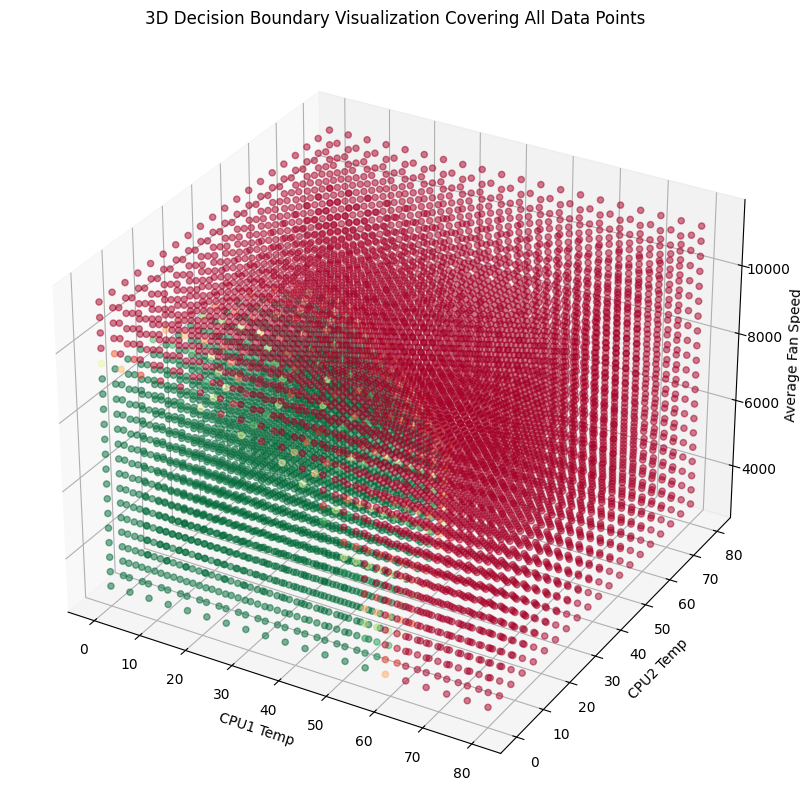

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Using Keras
from keras.models import load_model

# Load dataset
data_df = pd.read_csv('https://raw.githubusercontent.com/Okazeil/Final_Project/main/pm_sensor_data_converted.csv')

# 'scaler' is StandardScaler instance and 'model' is trained model
scaler = joblib.load('scaler.gz')
model = tf.keras.models.load_model('my_model.h5')

# Determine min and max values for each feature from the dataset
min_cpu1_temp = 0
max_cpu1_temp = 80
min_cpu2_temp = 0
max_cpu2_temp = 80
min_average_fan_speed = 3000
max_average_fan_speed = data_df['average_fan_speed'].max()

# Define the actual ranges for your features based on the min and max values
feature1_range = np.linspace(min_cpu1_temp, max_cpu1_temp, 20)
feature2_range = np.linspace(min_cpu2_temp, max_cpu2_temp, 20)
feature3_range = np.linspace(min_average_fan_speed, max_average_fan_speed, 20)

# Generate a mesh grid for 3D plotting
xx, yy, zz = np.meshgrid(feature1_range, feature2_range, feature3_range)

# Flatten the grid to pass into the model for predictions
grid = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# Scale the grid
grid_scaled = scaler.transform(grid)

# Predict on the grid
probabilities = model.predict(grid_scaled)

# Reshape the predictions to fit the xx, yy, zz grid for 3D plotting
decision_values = probabilities.reshape(xx.shape)

# Visualization
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary
ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=decision_values.ravel(), cmap='RdYlGn', alpha=0.5)

ax.set_xlabel('CPU1 Temp')
ax.set_ylabel('CPU2 Temp')
ax.set_zlabel('Average Fan Speed')
plt.title('3D Decision Boundary Visualization Covering All Data Points')

plt.show()